## Final Project Submission

Please fill out:
* Student name: Rafael Carrasco
* Student pace: Lead Instructor (Full Time)
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

from statsmodels.formula.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [271]:
df.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

# Clean Data

In [4]:
# handle null values in view and waterfront
df.view.fillna(value=0, inplace=True)
df.waterfront.fillna(value=0, inplace=True)
df.yr_renovated.fillna(value=0, inplace=True)

# drop id column
try:
    df.drop("id", axis=1, inplace=True)
except:
    print("already dropped id column")

# handle dates  
df.date = pd.to_datetime(df.date, infer_datetime_format=True)

# handle nulls sqft_basement
df.sqft_basement = ['0.0' if sqb=="?" else sqb for sqb in df.sqft_basement]# cleaning sqft_basement column
df.sqft_basement = [float(sqb) for sqb in df.sqft_basement] # convert to float

# set yr_renovated 0 values to yr_builtd
df.yr_renovated = [max(yrr, yrb) for yrr, yrb in zip(df.yr_renovated, df.yr_built)]

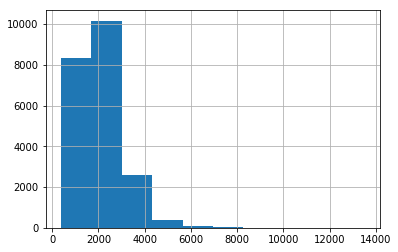

In [5]:
df.sqft_living.hist()

In [7]:
df["log_sqft_living"] = np.log(df.sqft_living)

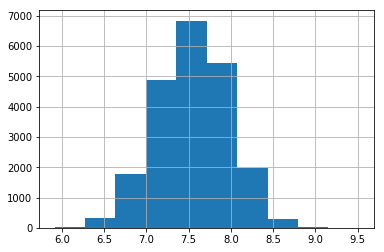

In [8]:
df.log_sqft_living.hist()

In [11]:
def get_zscores(arr):
    z_scores = (arr - arr.mean())/arr.std()
    return z_scores

In [13]:
z_scores_logsqft = get_zscores(df.log_sqft_living.values)

(array([2.400e+01, 3.080e+02, 1.792e+03, 4.876e+03, 6.838e+03, 5.440e+03,
        1.987e+03, 2.930e+02, 3.400e+01, 5.000e+00]),
 array([-3.85971248, -3.01104199, -2.16237151, -1.31370103, -0.46503055,
         0.38363993,  1.23231041,  2.08098089,  2.92965138,  3.77832186,
         4.62699234]),
 <a list of 10 Patch objects>)

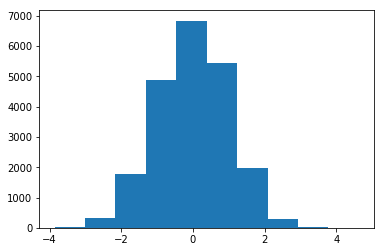

In [19]:
z_scores_logsqft.mean(), z_scores_logsqft.std() # -> good and normal distribution
plt.hist(z_scores_logsqft)

In [16]:
z_scores_sqft = get_zscores(df.sqft_living.values)

In [17]:
z_scores_sqft.mean(), z_scores_sqft.std()

(-1.3949628187353913e-16, 1.0)

In [9]:
df["mean_sqft_living"] = df.sqft_living/df.sqft_living.mean()

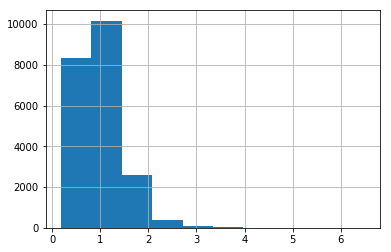

In [10]:
df.mean_sqft_living.hist()

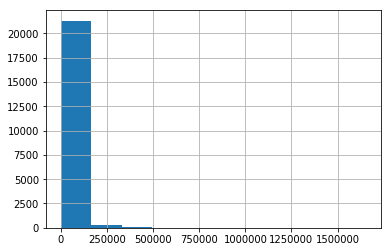

In [20]:
df.sqft_lot.hist()

In [22]:
df["log_sqft_lot"] = np.log(df.sqft_lot)

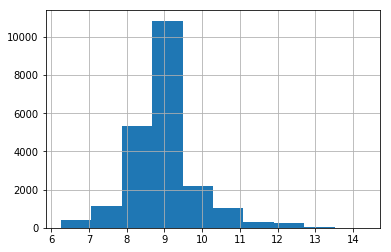

In [23]:
df.log_sqft_lot.hist()

# Feature engineering

In [273]:
df["living_difference"] = df.sqft_living15 - df.sqft_living

from collections import Counter
zip_counter = Counter()
for zipcode in df.zipcode:
    zip_counter[zipcode] += 1
df["zip_counts"] = [zip_counter[zipcode] for zipcode in df.zipcode]

# age of home
df["age_years"] = 2018 - df.yr_built

In [274]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_difference,zip_counts,age_years
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,160,262,63
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,-880,409,67
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,1950,283,85
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,-600,263,53
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,120,441,31


In [326]:
df["zip_mean"] = 

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [337]:
dfzipmean = df.groupby('zipcode')['price'].mean()
dfzipmean = dfzipmean.to_frame()
dfzipmean.reset_index(inplace=True)
dfzipmean.head()

,zipcode,price
0,98001,2.811949e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.356524e+06
4,98005,8.102897e+05


In [313]:
df2 = pd.get_dummies(df, columns=['zipcode'])

In [316]:
zipcodes = [col for col in df.columns if col.startswith('zipcode_')]

In [317]:
xdf = df2[['price', 'sqft_living'] + zipcodes]

In [318]:
y = xdf.pop('price').values
x = xdf.values

xtr, xte, ytr, yte = train_test_split(x, y, train_size=0.75, test_size=0.25)

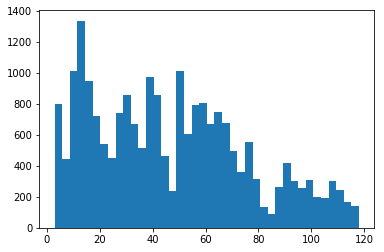

In [319]:
plt.hist(df2.age_years, bins=40)
plt.show()

In [322]:
model = LinearRegression()
model.fit(xtr, ytr)
model.score(xte, yte)

0.4973677951249774

In [323]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

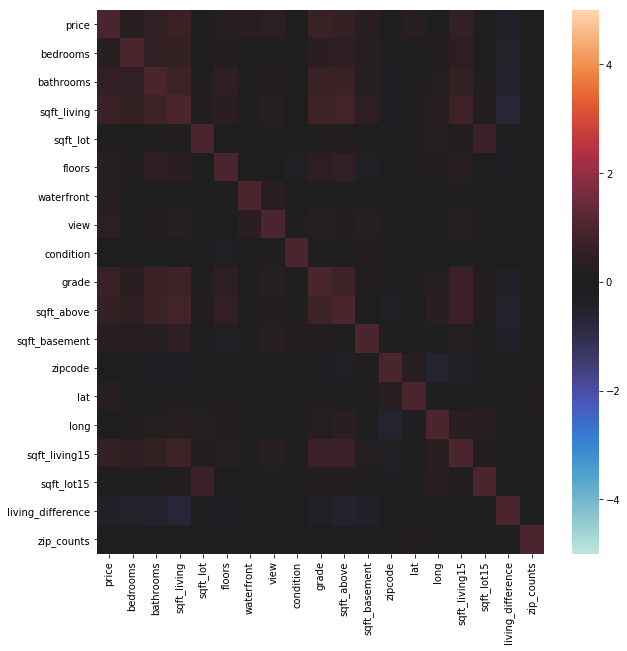

In [182]:
import seaborn as sns
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), center=0, vmax=5, vmin=-5);

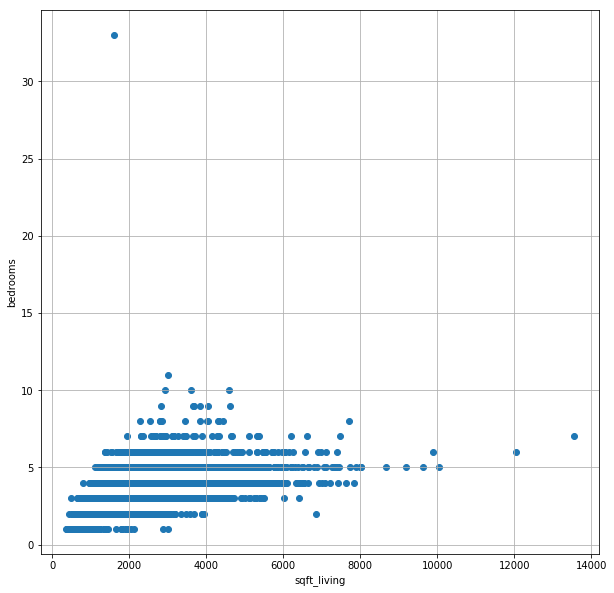

In [228]:
fig = plt.figure(figsize=(10, 10))
x = df.sqft_living
y = df.bedrooms
plt.scatter(x, y)
plt.xlabel("sqft_living")
plt.ylabel("bedrooms")
plt.grid()
plt.show()

In [229]:
df2 = df[df.bedrooms > 15]

In [231]:
df3 = df[df.sqft_living > 8000]

In [236]:
df4 = df.loc[(df.bedrooms <= 10) & (df.sqft_living <= 8000)]

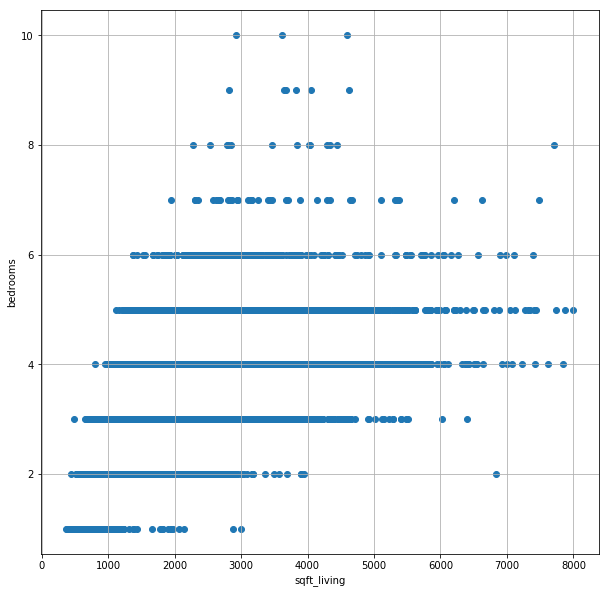

In [237]:
fig = plt.figure(figsize=(10, 10))
x = df4.sqft_living
y = df4.bedrooms
plt.scatter(x, y)
plt.xlabel("sqft_living")
plt.ylabel("bedrooms")
plt.grid()
plt.show()

In [240]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [239]:
df.drop(labels=['id'], axis=1, inplace=True)

In [251]:
for column in df.columns:
    print("{} contains {} null values".format(column, df[column].isna().sum()))

date contains 0 null values
price contains 0 null values
bedrooms contains 0 null values
bathrooms contains 0 null values
sqft_living contains 0 null values
sqft_lot contains 0 null values
floors contains 0 null values
waterfront contains 0 null values
view contains 0 null values
condition contains 0 null values
grade contains 0 null values
sqft_above contains 0 null values
sqft_basement contains 0 null values
yr_built contains 0 null values
yr_renovated contains 0 null values
zipcode contains 0 null values
lat contains 0 null values
long contains 0 null values
sqft_living15 contains 0 null values
sqft_lot15 contains 0 null values


In [244]:
df.waterfront.fillna(value=0, inplace=True)

In [249]:
df.view.fillna(value=0, inplace=True)

In [ ]:
fig = plt.figure(figsize=(20, 20))
pd.scatter_matrix(df)
plt.show()

In [265]:
df.cov()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.349594e+11,105078.123196,148568.512045,2.367447e+08,1.367348e+09,50914.450436,7956.568358,110539.645482,8617.103811,287884.229860,1.840879e+08,582238.753844,1.037212e+06,-1.049838e+06,15610.487100,1139.219208,1.473238e+08,8.300864e+08
bedrooms,1.050781e+05,0.858030,0.366489,4.917352e+02,1.245607e+03,0.088956,-0.000161,0.055499,0.015966,0.387488,3.675709e+02,4.235813,4.407679e+00,-7.638214e+00,-0.001277,0.017213,2.497061e+02,7.753598e+02
bathrooms,1.485685e+05,0.366489,0.591337,5.335718e+02,2.814288e+03,0.208575,0.004010,0.109381,-0.063272,0.600700,4.370876e+02,11.456580,1.185020e+01,-8.427106e+00,0.002587,0.024338,3.002897e+02,1.852024e+03
sqft_living,2.367447e+08,491.735224,533.571814,8.429189e+05,6.594883e+06,175.378938,7.872153,197.778115,-35.504570,821.605938,6.660751e+05,8580.434490,9.012789e+03,-9.816390e+03,6.634425,31.164650,4.758630e+05,4.616088e+06
sqft_lot,1.367348e+09,1245.606797,2814.288178,6.594883e+06,1.715006e+09,-107.599550,72.820676,2376.755347,-237.874696,5574.228789,6.312249e+06,64409.495132,6.217697e+04,-2.871769e+05,-490.662400,1341.699208,4.107956e+06,8.112162e+08
floors,5.091445e+04,0.088956,0.208575,1.753789e+02,-1.075996e+02,0.291258,0.000920,0.011726,-0.092714,0.290488,2.340803e+02,7.755323,7.821935e+00,-1.719538e+00,0.003682,0.009565,1.035836e+02,-1.578187e+02
waterfront,7.956568e+03,-0.000161,0.004010,7.872153e+00,7.282068e+01,0.000920,0.006715,0.023845,0.000887,0.007962,4.868673e+00,-0.058944,-1.634512e-02,1.268305e-01,-0.000138,-0.000434,4.706725e+00,6.852059e+01
view,1.105396e+05,0.055499,0.109381,1.977781e+02,2.376755e+03,0.011726,0.023845,0.584724,0.022695,0.223455,1.050827e+02,-1.223114,-5.894462e-01,3.480622e+00,0.000670,-0.008361,1.461519e+02,1.524226e+03
condition,8.617104e+03,0.015966,-0.063272,-3.550457e+01,-2.378747e+02,-0.092714,0.000887,0.022695,0.423210,-0.112114,-8.556889e+01,-6.909989,-7.348785e+00,1.005380e-01,-0.001361,-0.009693,-4.148914e+01,-5.546733e+01
grade,2.878842e+05,0.387488,0.600700,8.216059e+02,5.574229e+03,0.290488,0.007962,0.223455,-0.112114,1.376397,7.342428e+02,15.434784,1.559838e+01,-1.166298e+01,0.018461,0.033076,5.738865e+02,3.871192e+03


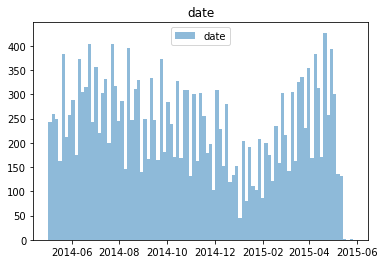

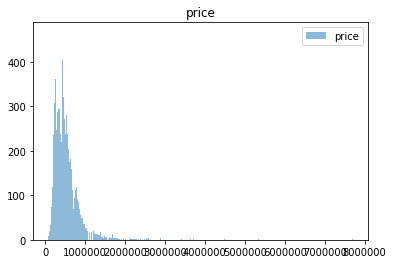

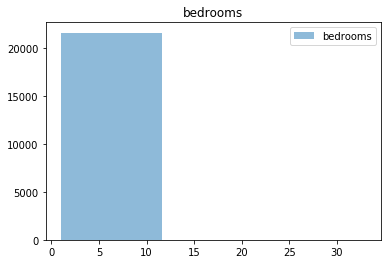

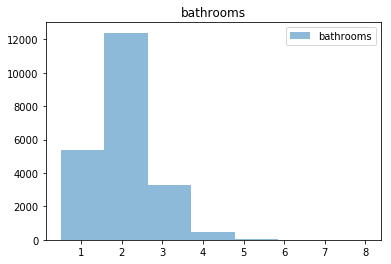

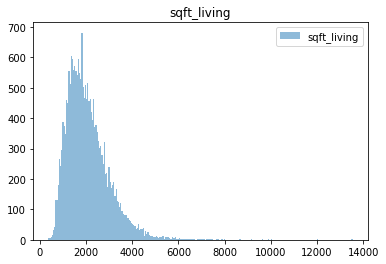

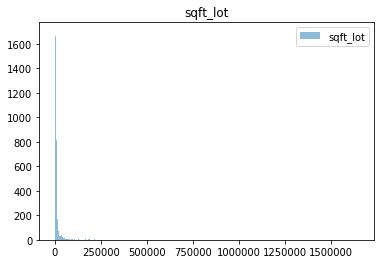

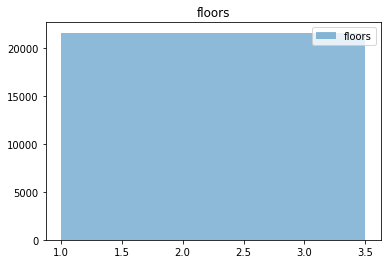

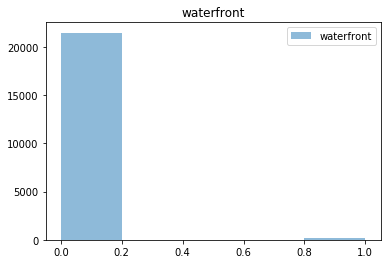

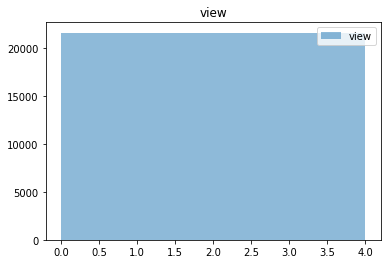

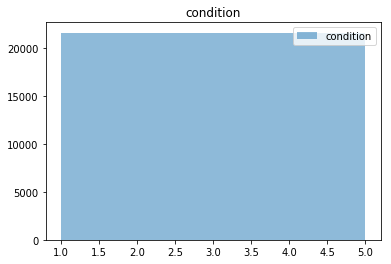

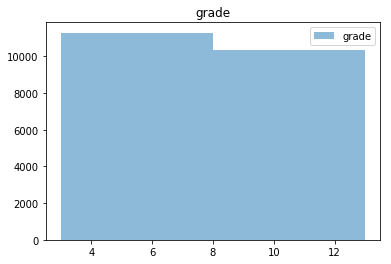

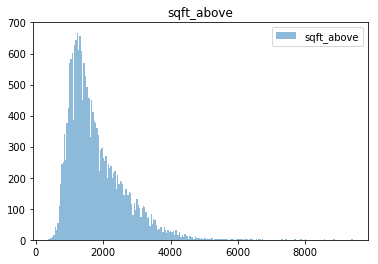

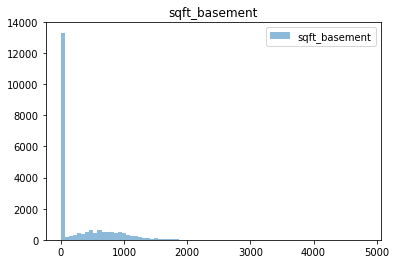

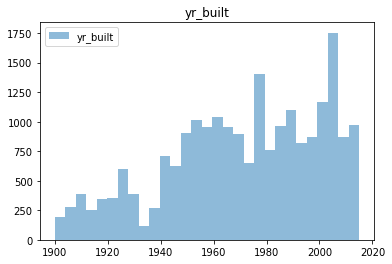

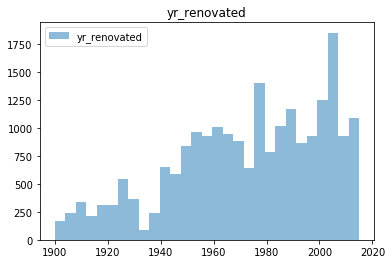

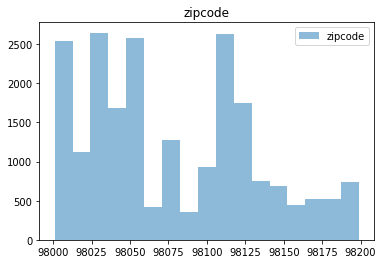

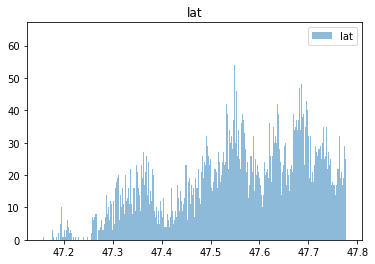

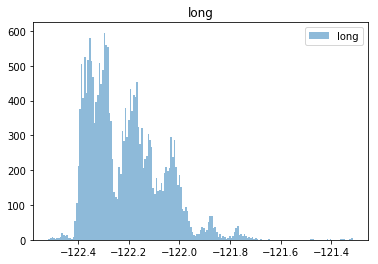

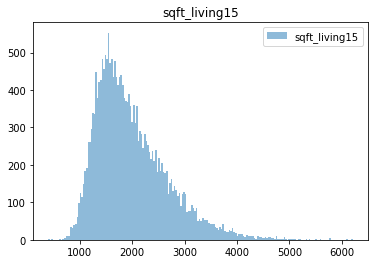

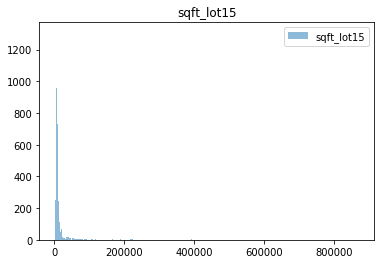

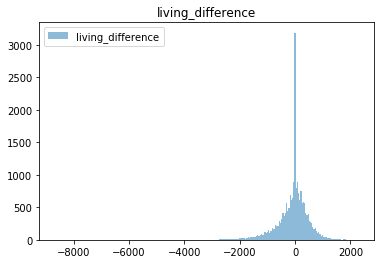

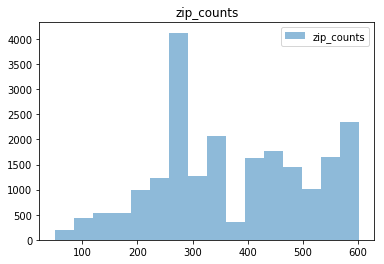

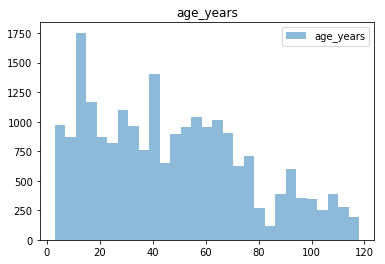

In [338]:
for x in df.columns:
    bins = int(len(df[x].unique())/4)
    bins = 5 if bins==0 else bins
    plt.hist(df[x], label=x, alpha=0.5, bins=bins)
    plt.title(x)
    plt.legend()
    plt.show()

In [97]:
def get_x_percent(df, column, x):
    """
    input
    column
    
    return
    the inner 95% of values
    """
    pass

In [ ]:
def

In [76]:
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [92]:
df2 = df.loc[(df.price <= df.price.mean() + 3*df.price.std()) & (df.price >= df.price.mean() - 3*df.price.std()) & (df.bedrooms <= 4)]

In [95]:
df2 = df2[["price", "bedrooms", "bathrooms", "sqft_living"]]
df2.head()
print(df.shape, df2.shape)

(21597, 20) (19395, 4)


In [81]:
y = df2.pop('price')
x = df2.values

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
xtr, xte, ytr, yte = train_test_split(x, y, train_size=0.75)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [84]:
model = LinearRegression()

In [85]:
model.fit(xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
yhat_tr = model.predict(xtr)
yhat_te = model.predict(xte)

In [87]:
# calcualte res
tr_res = yhat_tr - ytr # pred - true values
te_res = yhat_te - yte

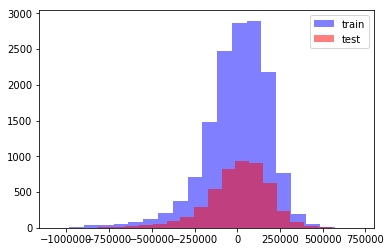

In [88]:
# plot residuals to look at distribution
plt.hist(tr_res, bins=20, color='b', alpha=0.5, label='train')
plt.hist(te_res, bins=20, color='r', alpha=0.5, label='test')
plt.legend()
plt.show()

In [89]:
# calculate mse
# formula  sum((ypred - ytrue)**2)/N
mse_tr = np.mean(np.sum((yhat_tr - ytr)**2))
mse_te = np.mean(np.sum((yhat_te - yte)**2))

In [90]:
# rmse
rmse_tr = np.sqrt(mse_tr)
rmse_te = np.sqrt(mse_te)
print(rmse_tr, rmse_te, float(rmse_te)/rmse_tr)

22553001.77482642 12566759.615007294 0.5572100663351283


In [91]:
float(mse_tr)/mse_te

3.22078765379476

In [99]:
pd.datetime.today()

datetime.datetime(2018, 10, 25, 13, 29, 48, 412043)

In [100]:
df["age"] = abs(df.date - pd.datetime.today())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1473 days 13:30:12.751126
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1416 days 13:30:12.751126
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1338 days 13:30:12.751126
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1416 days 13:30:12.751126
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1345 days 13:30:12.751126


In [102]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [104]:
model.score(xte, yte)

0.4359349945865336

In [105]:
model.score(x, y)

0.4438461586573347

In [106]:
model.score(xtr, ytr)

0.44622504278738734

In [110]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,living_difference
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1473 days 13:30:12.751126,160
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1416 days 13:30:12.751126,-880
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1338 days 13:30:12.751126,1950
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1416 days 13:30:12.751126,-600
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1345 days 13:30:12.751126,120


In [118]:
d = df.zipcode.value_counts()

In [128]:
d.index

Int64Index([98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023,
            98006, 98133, 98059, 98058, 98155, 98074, 98033, 98027, 98125,
            98056, 98053, 98001, 98075, 98126, 98092, 98144, 98106, 98116,
            98029, 98199, 98004, 98065, 98122, 98146, 98028, 98008, 98040,
            98198, 98003, 98072, 98031, 98112, 98168, 98055, 98107, 98136,
            98178, 98030, 98177, 98166, 98022, 98105, 98045, 98002, 98077,
            98011, 98019, 98108, 98119, 98005, 98007, 98188, 98032, 98014,
            98070, 98109, 98102, 98010, 98024, 98148, 98039],
           dtype='int64')

In [137]:
zipcodes = []
counts = []
for row in sorted(d.items()):
    zipcodes.append(row[0])
    counts.append(row[1])

<BarContainer object of 70 artists>

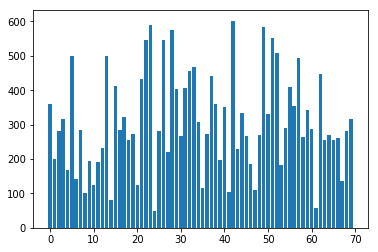

In [138]:
plt.bar(x=range(len(counts)), height=counts)

(array([ 5.,  6.,  7., 12., 13.,  7.,  5.,  4.,  5.,  6.]),
 array([ 50. , 105.2, 160.4, 215.6, 270.8, 326. , 381.2, 436.4, 491.6,
        546.8, 602. ]),
 <a list of 10 Patch objects>)

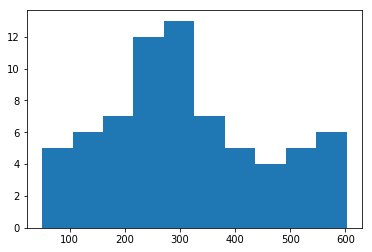

In [139]:
plt.hist(counts)

In [141]:
d_zip = dict(zip(zipcodes, counts))

In [339]:
from sklearn.ensemble import RandomForestRegressor

In [340]:
reg = RandomForestRegressor()

In [345]:
x = df2[[df2.columns!='price']]
y = df2.price

ValueError: Item wrong length 1 instead of 21597.